In [30]:
import streamlit as st
import pandas as pd
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [31]:
mu, sigma, bins = 50, 10, 60

n = 1000
x = np.linspace(0, 100, n)
y = norm.pdf(x, mu, sigma)
score = [gauss(mu, sigma) for _ in range(n)]
df = pd.DataFrame({"score": score})

2023-12-07 21:52:25.768 
  command:

    streamlit run C:\Users\kokie\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


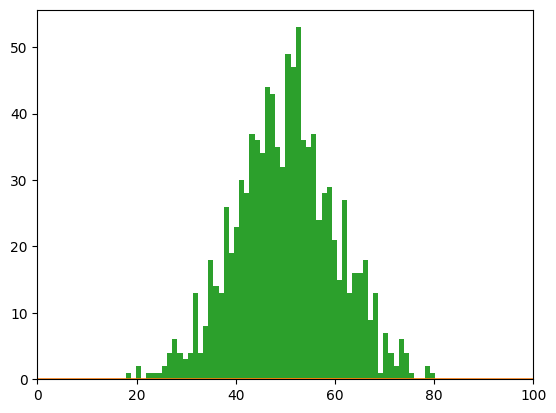

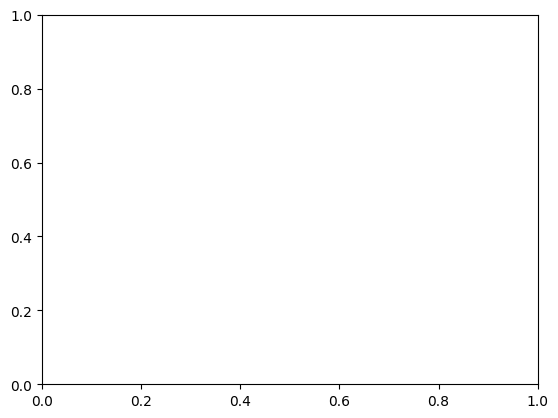

In [32]:
fig, ax = plt.subplots()
a,b,c = ax.hist(df, bins=bins, density=True)
ax.plot(x, y)
ax.set_xlim(0, 100)
st.pyplot(ax.figure)
fig1, ax1 = plt.subplots()
a1,b1,c1 = ax.hist(df, bins=bins)

In [33]:
# MSE計算
total = 0
b_means = [(b[i]+b[i-1])/2 for i in range(1,len(b))]
kansokutis = sorted(score)
for i in range(bins):
    total += (a[i] - norm.pdf(b_means[i], mu, sigma))**2 *int(a1[i])
st.subheader(f"MSE*10000: {total/n*10000:.5f}")

DeltaGenerator()

In [47]:
# MSEシュミレーション(計算時間かかる)
mse_list = []
for bins in range(1,100):
    total = 0
    a,b,c = ax.hist(df, bins=bins, density=True)
    a1, b1, c1 = ax.hist(df, bins=bins, density=False)
    b_means = [(b[i]+b[i-1])/2 for i in range(1,len(b))]
    kansokutis = sorted(score)
    for i in range(bins):
        total += (a[i] - norm.pdf(b_means[i], mu, sigma))**2 *int(a1[i])
    mse_list.append(total/n)

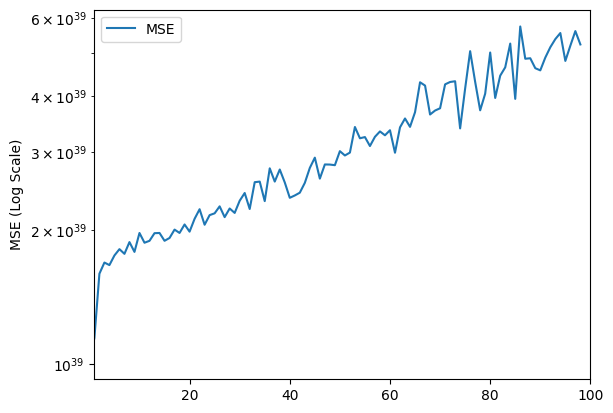

In [48]:
fig1, ax1 = plt.subplots()
df = pd.DataFrame({"MSE":mse_list})
ax1 = df.plot(ax=ax1)
ax1.set_xlim(1, 100)
#ax1.set_ylim(0,10000)
ax1.set_ylabel("MSE (Log Scale)")
ax1.set_yscale('log')
ax1.figure

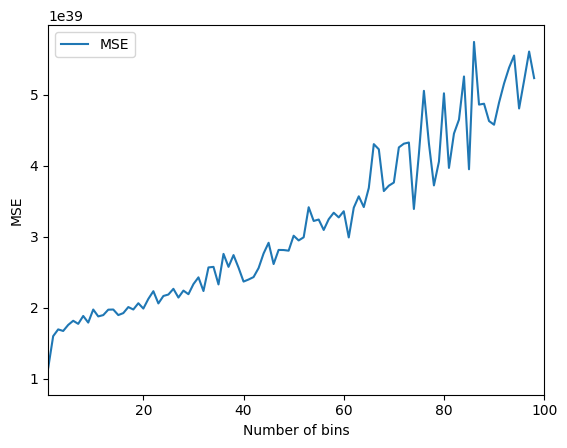

In [49]:
fig2, ax2 = plt.subplots()
ax2 = df.plot(ax=ax2)
ax2.set_xlim(1, 100)
#ax2.set_ylim(0,10000)
ax2.set_xlabel("Number of bins")
ax2.set_ylabel("MSE")
ax2.figure